# Assessing Rates of Death by Suicide in the USA
### References: “U.S. Department of Health & Human Services - NCHS - Leading Causes of Death: United States.” Catalog, Publisher Centers for Disease Control and Prevention, 23 Apr. 2025, https://catalog.data.gov/dataset/nchs-leading-causes-of-death-united-states. 
### “U.S. Census Bureau.” Encyclopædia Britannica, Encyclopædia Britannica, inc., 6 May 2025, www.britannica.com/topic/U-S-Census-Bureau. 
#### Rate of suicide has seen an obvious increase over the years. We see high rates in highly populated states but once we adjust for age, which we do as certain may have a lot more younger or older residents, we see less populated states have higher suicide rates.

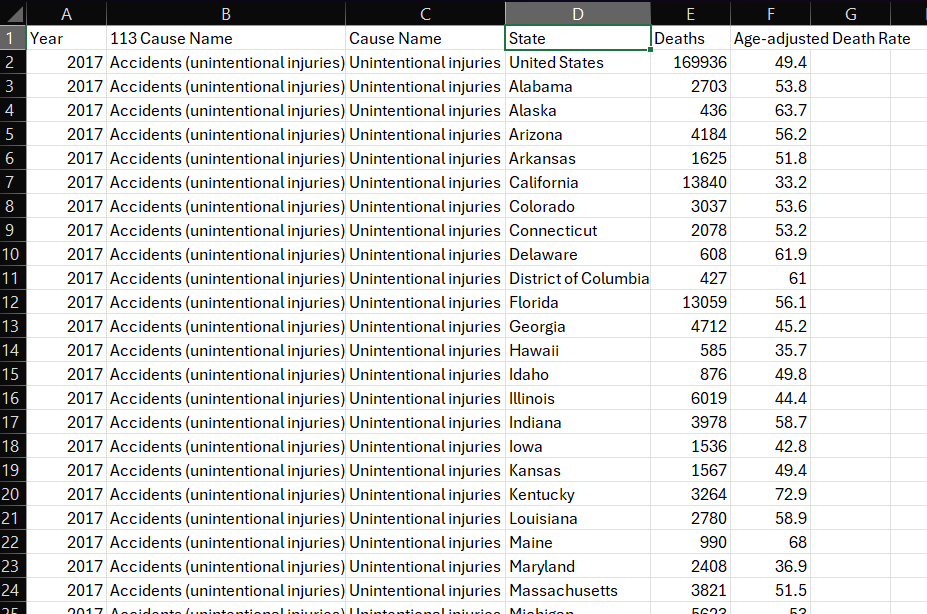

10869 total rows

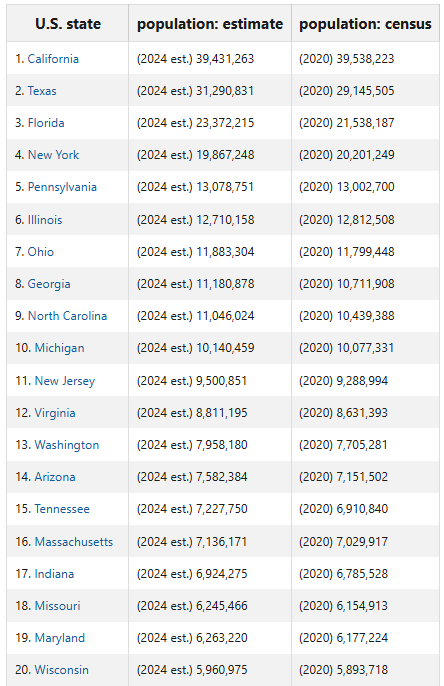

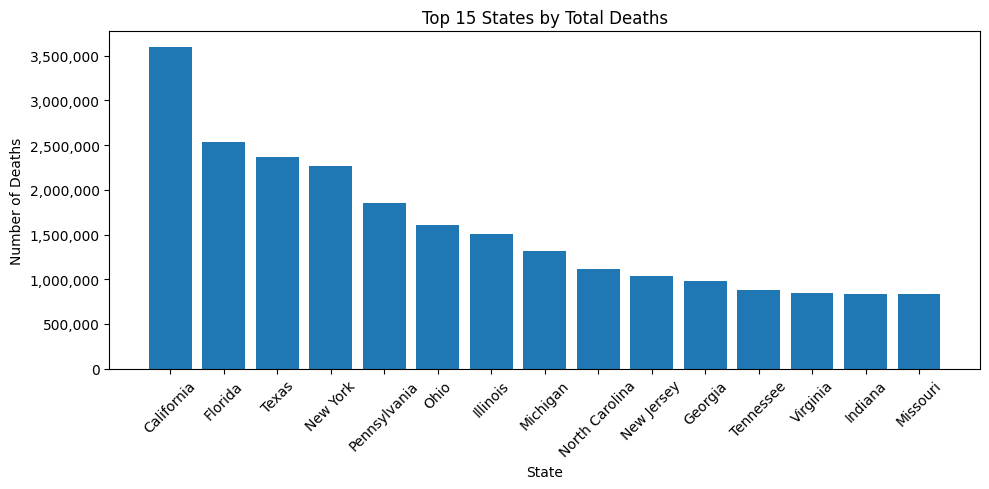

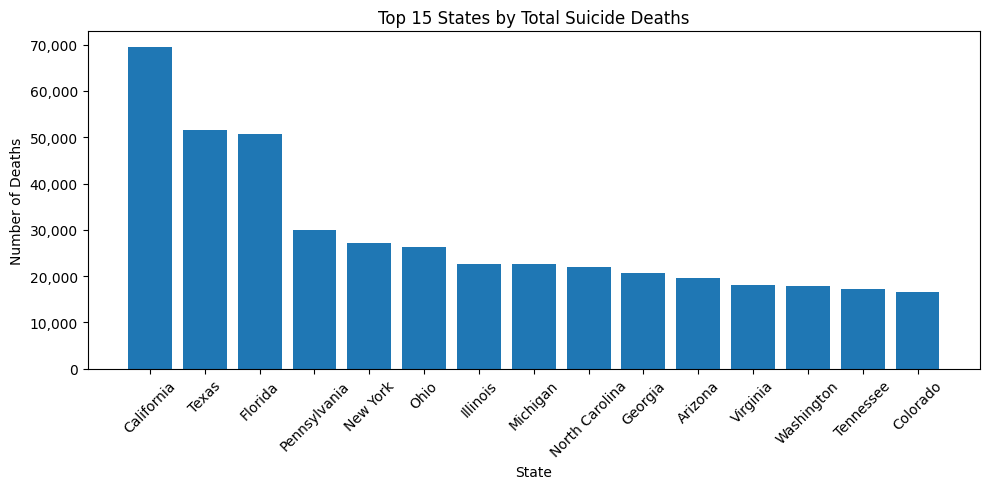

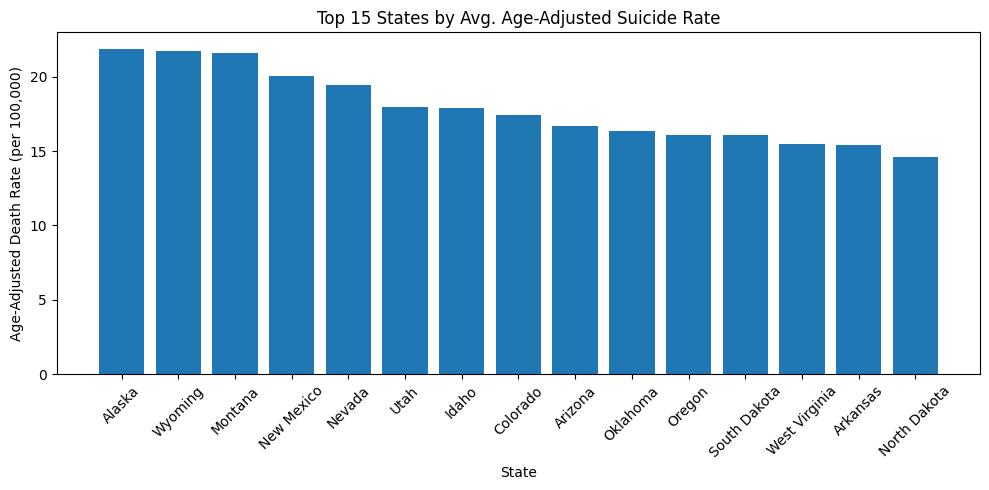

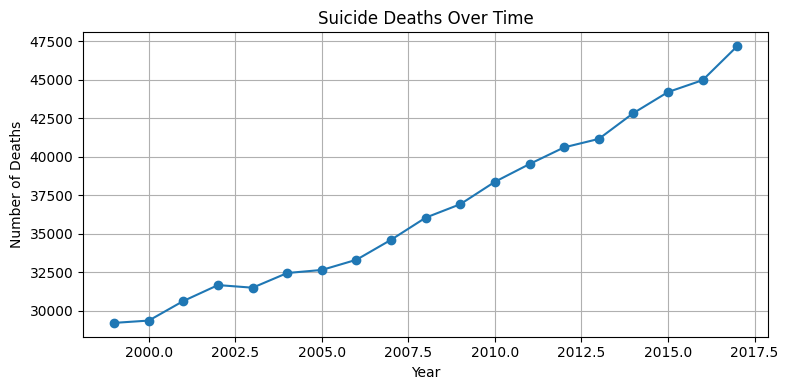

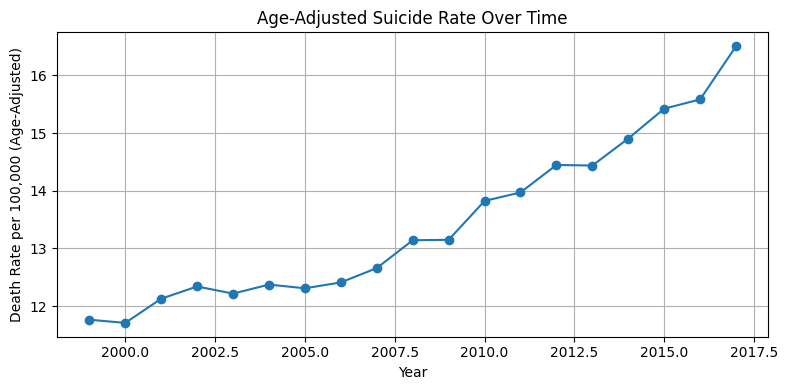

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States (1).csv')

data_cleaned = data.drop_duplicates()

filtered = data_cleaned[
    (data_cleaned['State'] != 'United States') & 
    (data_cleaned['Cause Name'] != 'All causes')
]

# Filter for suicide-related data only
suicide_data = filtered[filtered['Cause Name'] == 'Suicide']

# Graph 1: Top 15 States by Total Deaths (all causes)
state_totals = filtered.groupby('State')['Deaths'].sum()
top_15_total_states = state_totals.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
plt.bar(top_15_total_states.index, top_15_total_states.values)
plt.title('Top 15 States by Total Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

# Graph 2: Top 15 States by Total Suicide Deaths
suicide_by_state = (
    suicide_data.groupby('State')['Deaths']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 5))
plt.bar(suicide_by_state.index, suicide_by_state.values)
plt.title('Top 15 States by Total Suicide Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

# Graph 3: Top 15 States by Avg. Age-Adjusted Suicide Rate
avg_suicide_rate_by_state = (
    suicide_data.groupby('State')['Age-adjusted Death Rate']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 5))
plt.bar(avg_suicide_rate_by_state.index, avg_suicide_rate_by_state.values)
plt.title('Top 15 States by Avg. Age-Adjusted Suicide Rate')
plt.ylabel('Age-Adjusted Death Rate (per 100,000)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graph 4: Suicide Deaths Over Time
suicide_trend = suicide_data.groupby('Year')['Deaths'].sum().sort_index()

plt.figure(figsize=(8, 4))
suicide_trend.plot(marker='o', title='Suicide Deaths Over Time')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 5: Age-Adjusted Suicide Rate Over Time
suicide_rate_trend = suicide_data.groupby('Year')['Age-adjusted Death Rate'].mean().sort_index()

plt.figure(figsize=(8, 4))
suicide_rate_trend.plot(marker='o', title='Age-Adjusted Suicide Rate Over Time')
plt.ylabel('Death Rate per 100,000 (Age-Adjusted)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion: Steady increasing death rates show clear signs of need for more mental health programs and awareness, espcially in the highlighted states like Alaska, Wyoming, Montana, etc. where there rate is staggering considering their population sizes. 